In [1]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(".."))

In [ ]:
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv
from models.mc_dropout_bnn import MCDropoutBNN
from sampling_methods.random_exploration import random_exploration
from train import create_dataloader, train_model
from utils import combine_datasets

import torch
import os

env = MassSpringDamperEnv(nlin=True)

# Hyperparameters
NUM_TRAJECTORIES = 200
HORIZON = 500
BATCH_SIZE = 50
NUM_EPOCHS = 5
LEARNING_RATE = 1e-3
HIDDEN_SIZE = 64
DROP_PROB = 0.2

# Collect data from the environment
train_dataset = random_exploration(env, HORIZON)
for _ in range(NUM_TRAJECTORIES):
    new_dataset = random_exploration(env, HORIZON)
    train_dataset = combine_datasets(train_dataset, new_dataset)
# Create DataLoader for training
train_dataloader = create_dataloader(train_dataset, BATCH_SIZE)
# Collect data for test set
test_dataset = random_exploration(env, HORIZON)
# Create DataLoader for training
test_dataloader = create_dataloader(test_dataset, HORIZON)

# Initialize the dynamics model
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
model = MCDropoutBNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE, drop_prob=DROP_PROB)

# Train the model
train_model(model, train_dataloader, test_dataloader, NUM_EPOCHS, LEARNING_RATE, plot=True)

# Ensure the 'weights' directory exists
os.makedirs('../weights', exist_ok=True)

# Save the trained model
torch.save(model.model.state_dict(), '../weights/mc_dropout_mass_spring_damper.pth')
print("Model training completed successfully. "
      "Weights have been saved as 'mc_dropout_mass_spring_damper.pth' in the 'weights' directory.")

TypeError: random_exploration() takes 2 positional arguments but 3 were given

/tmp/ipykernel_403617/3988117878.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_model.load_state_dict(torch.load('../weights/mc_dropout_mass_spring_damper.pth'

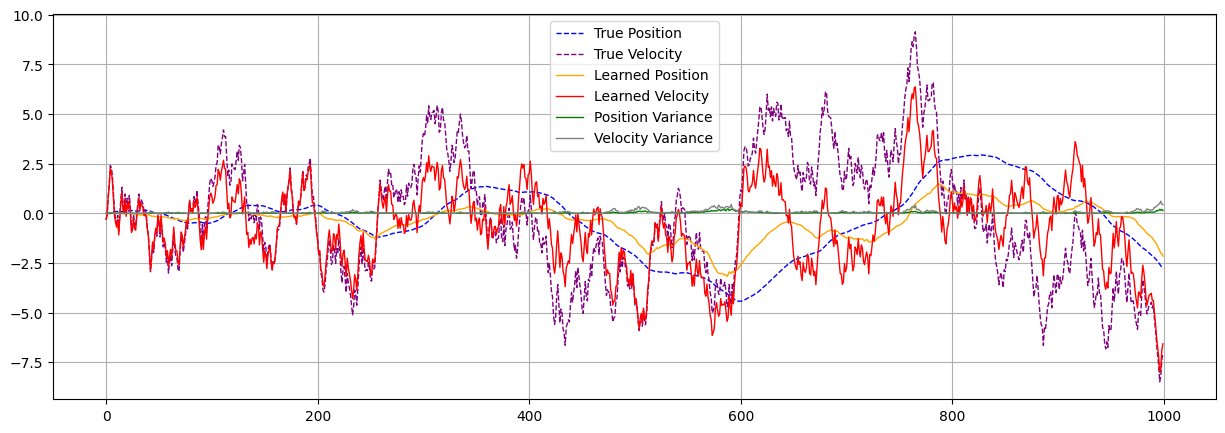

In [ ]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(".."))

# test model
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv

import numpy as np
import pygame
import matplotlib.pyplot as plt

# set random seed to get same test trajectory
test_seed = 44

# Initialize trained dynamics model
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
trained_model = MCDropoutBNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE, drop_prob=DROP_PROB)

# load saved weights
trained_model.load_state_dict(torch.load('../weights/mc_dropout_mass_spring_damper.pth'))

# learned dynamic
trained_env = MassSpringDamperEnv(model=trained_model)
trained_env.reset()
env.reset()
env.action_space.seed()
save = [[],[],[]]
save_var = []
# clock = pygame.time.Clock()
for _ in range(1000):
    action = env.action_space.sample()
    obs, _, _, _, _ = env.step(action)
    save[0].append(obs)
    obs, _, _, _, info = trained_env.step(action)
    save[1].append(obs)
    save[2].append(info['var'])
    # clock.tick(400)
trained_env.close()

saved_traj = np.array(save)
plt.figure(1, (15,5))
plt.plot(saved_traj[0,:,0], label="True Position", color="blue", linestyle="--", linewidth=1)
plt.plot(saved_traj[0,:,1], label="True Velocity", color="purple", linestyle="--", linewidth=1)
plt.plot(saved_traj[1,:,0], label="Learned Position", color="orange", linewidth=1)
plt.plot(saved_traj[1,:,1], label="Learned Velocity", color="red", linewidth=1)
plt.plot(saved_traj[2,:,0], label="Position Variance", color="green", linewidth=1)
plt.plot(saved_traj[2,:,1], label="Velocity Variance", color="gray", linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

Epoch 20/20: 100%|██████████| 500/500 [00:01<00:00, 476.29it/s]


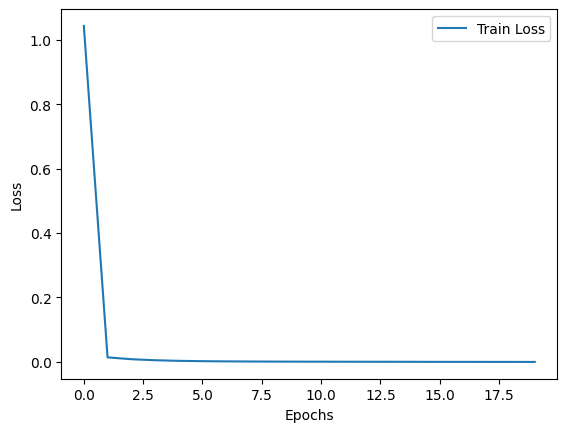

Epoch 20/20: 100%|██████████| 500/500 [00:01<00:00, 471.42it/s]


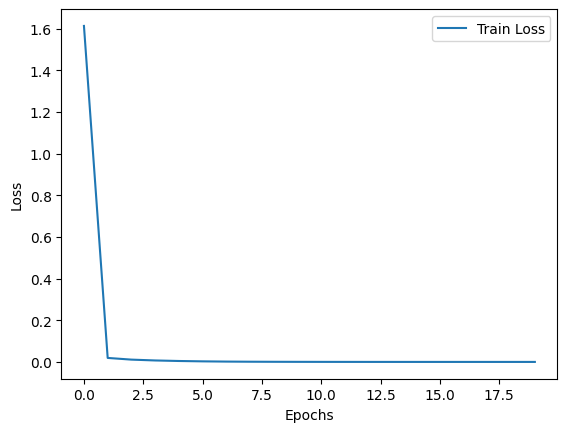

BNN OBSVERATION:  [-7.7828765e-05 -3.4125331e-01]
FEEDFORWARD OBSERVATION:  [-0.00100525 -0.34917435]
BNN OBSVERATION:  [-0.0037045 -0.5524072]
FEEDFORWARD OBSERVATION:  [-0.0061545 -0.5679552]
BNN OBSVERATION:  [-0.00964451 -0.53807306]
FEEDFORWARD OBSERVATION:  [-0.00826149 -0.55510515]
BNN OBSVERATION:  [-0.01356807  0.1946179 ]
FEEDFORWARD OBSERVATION:  [-0.01440051  0.17148282]
BNN OBSVERATION:  [-0.01066744  1.070927  ]
FEEDFORWARD OBSERVATION:  [-0.01247861  1.0364978 ]
BNN OBSVERATION:  [4.0749460e-04 1.5443604e+00]
FEEDFORWARD OBSERVATION:  [-0.00459387  1.4942794 ]
BNN OBSVERATION:  [0.01497481 0.86321825]
FEEDFORWARD OBSERVATION:  [0.01126811 0.80486494]
BNN OBSVERATION:  [0.02208371 0.5178952 ]
FEEDFORWARD OBSERVATION:  [0.01864294 0.45248124]
BNN OBSVERATION:  [0.02622271 0.41354367]
FEEDFORWARD OBSERVATION:  [0.0249494  0.33864266]
BNN OBSVERATION:  [0.03038322 0.04508439]
FEEDFORWARD OBSERVATION:  [ 0.0275766  -0.03596042]


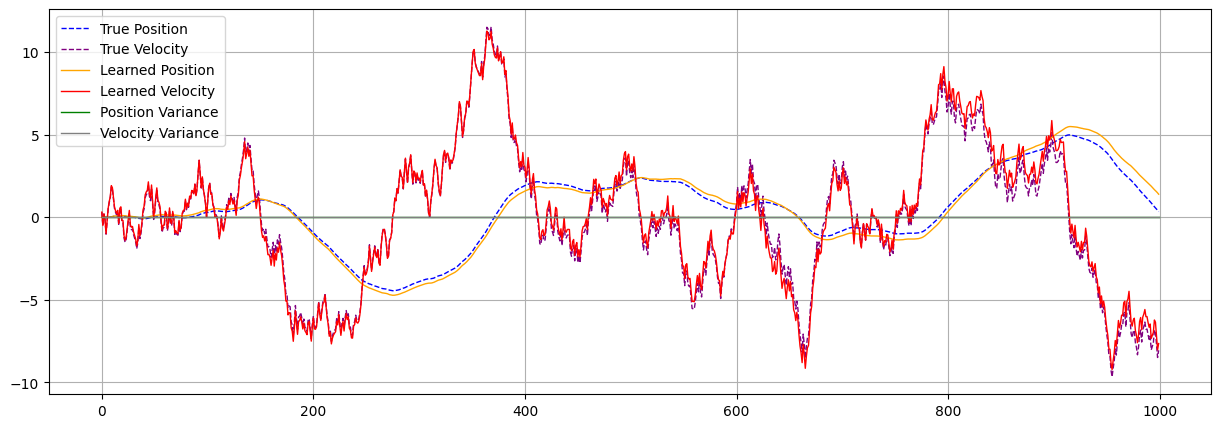

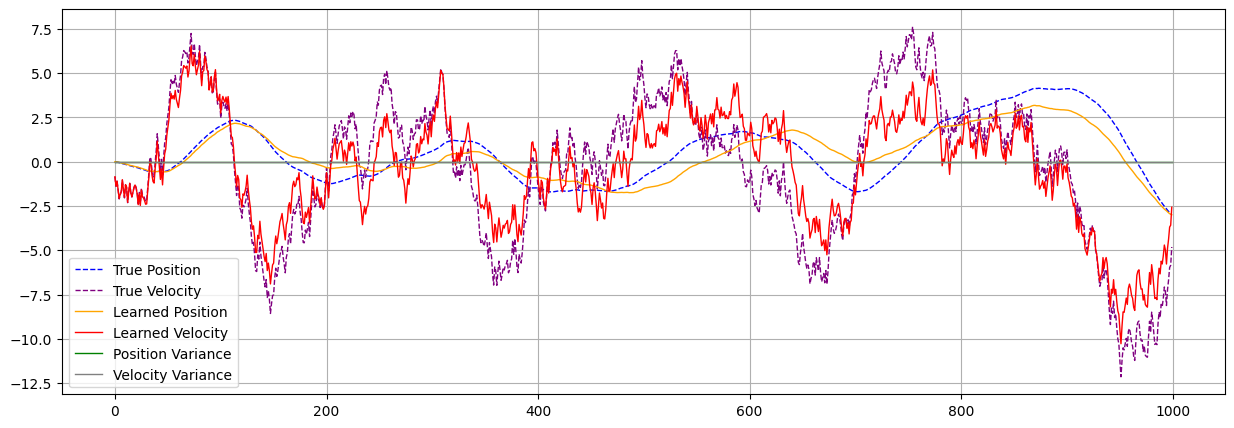

In [ ]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(".."))

from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv
from models.mc_dropout_bnn import MCDropoutBNN
from sampling_methods.random_exploration import random_exploration
from train import create_dataloader, train_model
from utils import combine_datasets

import torch
import os
import numpy as np
import pygame
import matplotlib.pyplot as plt

env = MassSpringDamperEnv(nlin=True)

# Hyperparameters
NUM_TRAJECTORIES = 200
HORIZON = 1000
BATCH_SIZE = 200
NUM_EPOCHS = 20
LEARNING_RATE = 1e-3
HIDDEN_SIZE = 32
DROP_PROB = 0.0

# Collect data from the environment
train_dataset = random_exploration(env, HORIZON)
for _ in range(NUM_TRAJECTORIES):
    new_dataset = random_exploration(env, HORIZON)
    train_dataset = combine_datasets(train_dataset, new_dataset)
# Create DataLoader for training
train_dataloader = create_dataloader(train_dataset, BATCH_SIZE)

# Initialize the dynamics model
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
bnn_model = MCDropoutBNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE, drop_prob=DROP_PROB)
ff_model = MCDropoutBNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE, drop_prob=0)

bnn_env = MassSpringDamperEnv(model=bnn_model)
ff_env = MassSpringDamperEnv(model=ff_model)
bnn_env.reset()
ff_env.reset()
env.reset()

# Train the models
train_model(bnn_env.model, train_dataloader, num_epochs=NUM_EPOCHS, learning_rate=LEARNING_RATE, plot=True)
train_model(ff_env.model, train_dataloader, num_epochs=NUM_EPOCHS, learning_rate=LEARNING_RATE, plot=True)

for _ in range(10):
    action = env.action_space.sample()
    bnn_obs, _, _, _, info = bnn_env.step(action)
    ff_obs, _, _, _, info = ff_env.step(action)
    print("BNN OBSVERATION: ", bnn_obs)
    print("FEEDFORWARD OBSERVATION: ", ff_obs)

bnn_env.reset()
ff_env.reset()
env.reset()

bnn_save = [[],[],[]]
# clock = pygame.time.Clock()
for _ in range(1000):
    action = env.action_space.sample()
    obs, _, _, _, _ = env.step(action)
    bnn_save[0].append(obs)
    obs, _, _, _, info = bnn_env.step(action)
    bnn_save[1].append(obs)
    bnn_save[2].append(info['var'])
    # clock.tick(400)
bnn_env.close()

bnn_saved_traj = np.array(bnn_save)
plt.figure(1, (15,5))
plt.plot(bnn_saved_traj[0,:,0], label="True Position", color="blue", linestyle="--", linewidth=1)
plt.plot(bnn_saved_traj[0,:,1], label="True Velocity", color="purple", linestyle="--", linewidth=1)
plt.plot(bnn_saved_traj[1,:,0], label="Learned Position", color="orange", linewidth=1)
plt.plot(bnn_saved_traj[1,:,1], label="Learned Velocity", color="red", linewidth=1)
plt.plot(bnn_saved_traj[2,:,0], label="Position Variance", color="green", linewidth=1)
plt.plot(bnn_saved_traj[2,:,1], label="Velocity Variance", color="gray", linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

bnn_env.reset()
ff_env.reset()
env.reset()

ff_save = [[],[],[]]
# clock = pygame.time.Clock()
for _ in range(1000):
    action = env.action_space.sample()
    obs, _, _, _, _ = env.step(action)
    ff_save[0].append(obs)
    obs, _, _, _, info = ff_env.step(action)
    ff_save[1].append(obs)
    ff_save[2].append(info['var'])
    # clock.tick(400)
ff_env.close()

ff_saved_traj = np.array(ff_save)
plt.figure(1, (15,5))
plt.plot(ff_saved_traj[0,:,0], label="True Position", color="blue", linestyle="--", linewidth=1)
plt.plot(ff_saved_traj[0,:,1], label="True Velocity", color="purple", linestyle="--", linewidth=1)
plt.plot(ff_saved_traj[1,:,0], label="Learned Position", color="orange", linewidth=1)
plt.plot(ff_saved_traj[1,:,1], label="Learned Velocity", color="red", linewidth=1)
plt.plot(ff_saved_traj[2,:,0], label="Position Variance", color="green", linewidth=1)
plt.plot(ff_saved_traj[2,:,1], label="Velocity Variance", color="gray", linewidth=1)
plt.legend()
plt.grid(True)
plt.show()